In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import umap
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

df_rows = pd.read_csv("GSE121861_syngeneic_row_data.csv")  #data about gene names and id
df_col = pd.read_csv("GSE121861_syngeneic_column_data.csv") #data about the samples
df_rows.loc[:,"id"] = df_rows["GeneSymbol"] + df_rows["ENSMUSG_ID"]
df_exp = pd.read_csv("GSE121861_syngeneic_expression.csv", names = df_rows["id"]) #gene expression data
        
df_rows.shape, df_col.shape, df_exp.shape

((27998, 3), (10473, 4), (10473, 27998))

here we import all the modules and the data from .csv files

In [2]:
X_tr, X_ts = train_test_split(df_exp)

In this cell we use train_test_split function to generate different data to train and test the model.
The column "Model" contains the syngenic tumor model for each cell 

In [3]:
reducer = umap.UMAP(random_state=42)
embedtr = reducer.fit_transform(X_tr)
embedts = reducer.transform(X_ts)

Here we delcare a UMAP object and use fit_transform to train the reducer with the training data

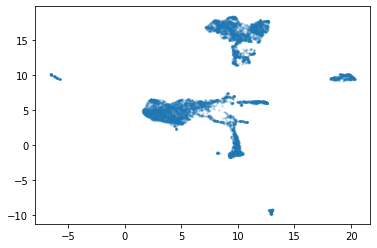

In [4]:
plt.scatter(      #plot UMAP result coloured by their label
    embedtr[:,0],
    embedtr[:,1],
    alpha = 0.2,
    s = 2
)
plt.xlabel = "UMAP_1"
plt.ylabel = "UMAP_2"
plt.title = "UMAP applied on Mouse training set"

# Clustering


We will use DBSCAN to divide in clusters the UMAP projection

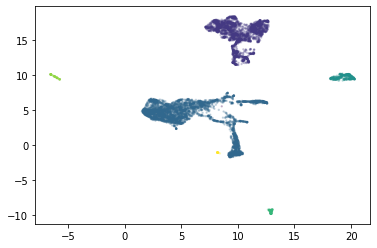

In [5]:
clustering = DBSCAN(min_samples=2).fit(embedtr)
plt.scatter(
    embedtr[:,0],
    embedtr[:,1],
    c = clustering.labels_,
    alpha = 0.2,
    s = 2,
)
plt.xlabel = "UMAP_1"
plt.ylabel = "UMAP_2"
plt.title = "DBSCAN clustering"

# Classification with stochastic gradient descent

In [6]:
classifier = SGDClassifier()
classifier.fit(X_tr, clustering.labels_)

SGDClassifier()

In this cell we train an SGD classifier with training set and labels

In [20]:
sgdlabels = classifier.predict(X_ts)

ValueError: X has 28002 features per sample; expecting 27998

now we use the trained classifier to predict the labels of the test set

# Classification with random forest

In [8]:
classifier_rf = RandomForestClassifier()
classifier_rf.fit(X_tr, clustering.labels_)
rflabels = classifier_rf.predict(X_ts)

# plotting the results

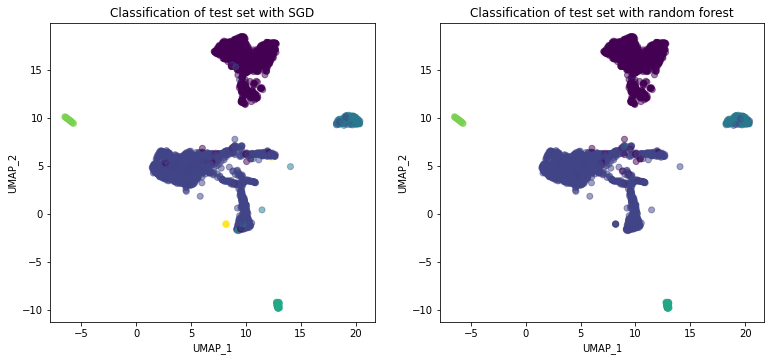

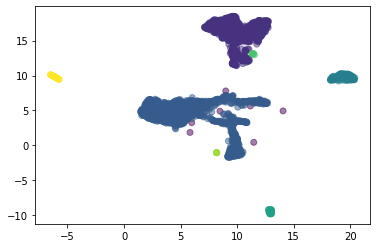

In [9]:
fig, canv = plt.subplots(1, 2, figsize=(12.8, 5.5))

canv[0].scatter(
    embedts[:, 0], # first column as X
    embedts[:, 1], # second column as Y
    alpha=0.5,
    c = sgdlabels
)
canv[0].set_xlabel("UMAP_1")
canv[0].set_ylabel("UMAP_2")
canv[0].set_title("Classification of test set with SGD")

canv[1].scatter(
    embedts[:, 0], # first column as X
    embedts[:, 1], # second column as Y
    alpha=0.5,
    c=rflabels
)
canv[1].set_xlabel("UMAP_1")
canv[1].set_ylabel("UMAP_2")
canv[1].set_title("Classification of test set with random forest");


y_tr = DBSCAN(min_samples=2).fit(embedts)
plt.show()
plt.scatter(
    embedts[:, 0], # first column as X
    embedts[:, 1], # second column as Y
    alpha=0.5,
    c=y_tr.labels_
)

In [63]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
y_tr = DBSCAN(min_samples=2).fit(embedts)
print(accuracy_score(y_tr.labels_, sgdlabels))
print(accuracy_score(y_tr.labels_, rflabels))
sgdlabels, rflabels, y_tr.labels_

TypeError: __init__() got an unexpected keyword argument 'random_seed'

In [12]:
from sklearn.preprocessing import normalize

In [85]:
max_exp_gene = []
X_ts = pd.DataFrame(normalize(X_ts))
X_ts.loc[:,"cluster"] = y_tr.labels_ 
X_ts.replace(0, np.NaN)
for clt in np.unique(y_tr.labels_):
    sum_exp_genes = X_ts[X_ts.cluster == clt].sum(axis = 0)
    sum_exp_genes["cluster"] = 0
    top_exp = sum_exp_genes[np.argpartition(sum_exp_genes, len(sum_exp_genes) - 15)[-15:]]
    print(X_ts.where(top_exp))
    #diff = top_exp/X_ts[np.where(top_exp)][X_ts.cluster != clt].mean()
   
    #top_diff = np.sort(diff)
    #print(clt, top_exp, top_diff)
    #print(df_exp.columns[np.where(top_diff)])#, X_ts.columns[top5_exp[1]])
    


KeyboardInterrupt: 

In [67]:
np.argpartition(sum_exp_genes, len(sum_exp_genes)-5)[-5:]


27997      19330
27998      13355
27999      27999
28000      28000
cluster    19328
dtype: int64

In [18]:
print(matthews_corrcoef(sgdlabels, y_tr.labels_ ))
print(matthews_corrcoef( rflabels, y_tr.labels_))

0.9381104184906107
0.9332588263682599
